## Setup

Data is spam/ham text messages.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
# from prepare import 
from acquire import git_data
from formating import bold, display, Latex, Markdown, percent, Percent, strike, underline

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [3]:
df = git_data(df=True)

In [4]:
df

language  \
repo                                                      
0voice/interview_internal_reference              Python   
2dust/v2rayN                                         C#   
30-seconds/30-seconds-of-code                JavaScript   
521xueweihan/HelloGitHub                         Python   
Airblader/i3                                          C   
...                                                 ...   
yuzu-emu/yuzu                                       C++   
zealdocs/zeal                                       C++   
zergtant/pytorch-handbook              Jupyter Notebook   
zero-to-mastery/start-here-guidelines            Python   
zxing/zxing                                        Java   

                                                                         readme_contents  
repo                                                                                      
0voice/interview_internal_reference    \n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...  
2dust/v2rayN                           # v2rayN\nA V2Ray client for Windows, support ...  
30-seconds/30-seconds-of-code          [![Logo](/logo.png)](https://30secondsofcode.o...  
521xueweihan/HelloGitHub               <p align="center">\n  <img src="https://cdn.js...  
Airblader/i3                           [![Build Status](https://github.com/Airblader/...  
...                                                                                  ...  
yuzu-emu/yuzu                          <!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...  
zealdocs/zeal                          # Zeal\n\n[![Changelog](https://img.shields.io...  
zergtant/pytorch-handbook              # PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...  
zero-to-mastery/start-here-guidelines  Guidelines on how this open-source community w...  
zxing/zxing                            <img align="right" src="https://raw.github.com...  

[601 rows x 2 columns]

In [5]:
df.reset_index()

repo          language  \
0      0voice/interview_internal_reference            Python   
1                             2dust/v2rayN                C#   
2            30-seconds/30-seconds-of-code        JavaScript   
3                 521xueweihan/HelloGitHub            Python   
4                             Airblader/i3                 C   
..                                     ...               ...   
596                          yuzu-emu/yuzu               C++   
597                          zealdocs/zeal               C++   
598              zergtant/pytorch-handbook  Jupyter Notebook   
599  zero-to-mastery/start-here-guidelines            Python   
600                            zxing/zxing              Java   

                                       readme_contents  
0    \n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...  
1    # v2rayN\nA V2Ray client for Windows, support ...  
2    [![Logo](/logo.png)](https://30secondsofcode.o...  
3    <p align="center">\n  <img src="https://cdn.js...  
4    [![Build Status](https://github.com/Airblader/...  
..                                                 ...  
596  <!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...  
597  # Zeal\n\n[![Changelog](https://img.shields.io...  
598  # PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...  
599  Guidelines on how this open-source community w...  
600  <img align="right" src="https://raw.github.com...  

[601 rows x 3 columns]

In [6]:
df.language.value_counts()

PHP                 108
C++                 107
Python              106
C                   102
HTML                 83
JavaScript           20
Java                 20
Jupyter Notebook     20
C#                   18
TypeScript           16
Name: language, dtype: int64

In [10]:
df['original_length'] = df.readme_contents.apply(len)

In [11]:
df

language  \
repo                                                      
0voice/interview_internal_reference              Python   
2dust/v2rayN                                         C#   
30-seconds/30-seconds-of-code                JavaScript   
521xueweihan/HelloGitHub                         Python   
Airblader/i3                                          C   
...                                                 ...   
yuzu-emu/yuzu                                       C++   
zealdocs/zeal                                       C++   
zergtant/pytorch-handbook              Jupyter Notebook   
zero-to-mastery/start-here-guidelines            Python   
zxing/zxing                                        Java   

                                                                         readme_contents  \
repo                                                                                       
0voice/interview_internal_reference    \n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...   
2dust/v2rayN                           # v2rayN\nA V2Ray client for Windows, support ...   
30-seconds/30-seconds-of-code          [![Logo](/logo.png)](https://30secondsofcode.o...   
521xueweihan/HelloGitHub               <p align="center">\n  <img src="https://cdn.js...   
Airblader/i3                           [![Build Status](https://github.com/Airblader/...   
...                                                                                  ...   
yuzu-emu/yuzu                          <!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...   
zealdocs/zeal                          # Zeal\n\n[![Changelog](https://img.shields.io...   
zergtant/pytorch-handbook              # PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...   
zero-to-mastery/start-here-guidelines  Guidelines on how this open-source community w...   
zxing/zxing                            <img align="right" src="https://raw.github.com...   

                                       original_length  
repo                                                    
0voice/interview_internal_reference              37402  
2dust/v2rayN                                      1371  
30-seconds/30-seconds-of-code                     1931  
521xueweihan/HelloGitHub                          5152  
Airblader/i3                                      4737  
...                                                ...  
yuzu-emu/yuzu                                     4460  
zealdocs/zeal                                     3166  
zergtant/pytorch-handbook                         3472  
zero-to-mastery/start-here-guidelines             7483  
zxing/zxing                                       6834  

[601 rows x 3 columns]

In [9]:
display(Markdown(df.readme_contents.apply(len).to_markdown()))

| repo                                                                        |   readme_contents |
|:----------------------------------------------------------------------------|------------------:|
| 0voice/interview_internal_reference                                         |             37402 |
| 2dust/v2rayN                                                                |              1371 |
| 30-seconds/30-seconds-of-code                                               |              1931 |
| 521xueweihan/HelloGitHub                                                    |              5152 |
| Airblader/i3                                                                |              4737 |
| Aircoookie/WLED                                                             |              4693 |
| ApolloAuto/apollo                                                           |             11619 |
| Atmosphere-NX/Atmosphere                                                    |              4121 |
| AvaloniaUI/Avalonia                                                         |              8242 |
| Awesome-HarmonyOS/HarmonyOS                                                 |              8395 |
| BVLC/caffe                                                                  |              2468 |
| Blankj/AndroidUtilCode                                                      |              2953 |
| CMU-Perceptual-Computing-Lab/openpose                                       |             11566 |
| CachetHQ/Cachet                                                             |              5210 |
| CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers |             18941 |
| ChartsCSS/charts.css                                                        |              3456 |
| ChenYilong/iOSInterviewQuestions                                            |              3988 |
| ClickHouse/ClickHouse                                                       |              2263 |
| ColorlibHQ/gentelella                                                       |              6916 |
| CompVis/stable-diffusion                                                    |             12439 |
| CorentinJ/Real-Time-Voice-Cloning                                           |              5303 |
| DapperLib/Dapper                                                            |             24726 |
| DefinitelyTyped/DefinitelyTyped                                             |             25483 |
| DesignPatternsPHP/DesignPatternsPHP                                         |              7147 |
| DevinVinson/WordPress-Plugin-Boilerplate                                    |              6046 |
| EZLippi/Tinyhttpd                                                           |              5222 |
| ElemeFE/node-interview                                                      |              1037 |
| Foundry376/Mailspring                                                       |              6256 |
| FreshRSS/FreshRSS                                                           |             20186 |
| FriendsOfPHP/Goutte                                                         |              2862 |
| FriendsOfPHP/PHP-CS-Fixer                                                   |              2767 |
| GetPublii/Publii                                                            |              5075 |
| GrowingGit/GitHub-Chinese-Top-Charts                                        |             20152 |
| Huxpro/huxpro.github.io                                                     |              2389 |
| InstaPy/InstaPy                                                             |              3911 |
| Intervention/image                                                          |              1954 |
| IonicaBizau/git-stats                                                       |             11069 |
| Laravel-Lang/lang                                                           |              2389 |
| Light-City/CPlusPlusThings                                                  |             10657 |
| Lightning-AI/lightning                                                      |             23534 |
| LingDong-/shan-shui-inf                                                     |               782 |
| MLEveryday/100-Days-Of-ML-Code                                              |             13094 |
| MisterBooo/LeetCodeAnimation                                                |             13466 |
| NARKOZ/hacker-scripts                                                       |              3437 |
| OWASP/CheatSheetSeries                                                      |              3439 |
| Ocramius/ProxyManager                                                       |              2906 |
| OctoLinker/OctoLinker                                                       |              3935 |
| OpenVPN/openvpn                                                             |              2171 |
| PKUFlyingPig/cs-self-learning                                               |              3039 |
| PKUanonym/REKCARC-TSC-UHT                                                   |              3316 |
| PaddlePaddle/Paddle                                                         |              6905 |
| PaddlePaddle/VisualDL                                                       |             21009 |
| PanDownloadServer/Server                                                    |               171 |
| PatrickJS/awesome-angular                                                   |             75394 |
| PhilJay/MPAndroidChart                                                      |              7978 |
| Polymer/polymer                                                             |              9493 |
| PowerShell/PowerShell                                                       |             20523 |
| PrestaShop/PrestaShop                                                       |              9804 |
| Qv2ray/Qv2ray                                                               |              6884 |
| RT-Thread/rt-thread                                                         |             11044 |
| SamyPesse/How-to-Make-a-Computer-Operating-System                           |              1594 |
| Seldaek/monolog                                                             |              6115 |
| SerenityOS/serenity                                                         |              9845 |
| ShusenTang/Dive-into-DL-PyTorch                                             |                 0 |
| Snailclimb/JavaGuide                                                        |             23221 |
| SoftEtherVPN/SoftEtherVPN                                                   |             12727 |
| SpacehuhnTech/esp8266_deauther                                              |              5836 |
| SpartnerNL/Laravel-Excel                                                    |              4888 |
| StartBootstrap/startbootstrap-sb-admin-2                                    |              4141 |
| StevenBlack/hosts                                                           |             36730 |
| TarsCloud/Tars                                                              |              3488 |
| TeamUltroid/Ultroid                                                         |              6910 |
| TedGoas/Cerberus                                                            |              2986 |
| Tencent/MMKV                                                                |             11674 |
| Tencent/mars                                                                |             22634 |
| Tencent/matrix                                                              |             32387 |
| Tencent/ncnn                                                                |             23388 |
| Tencent/xLua                                                                |              3424 |
| TencentARC/GFPGAN                                                           |             11710 |
| Textualize/rich                                                             |             12726 |
| TheAlgorithms/C                                                             |              5257 |
| TheAlgorithms/C-Plus-Plus                                                   |              5530 |
| TheAlgorithms/Python                                                        |              2714 |
| Unity-Technologies/ml-agents                                                |             12428 |
| ValveSoftware/Proton                                                        |             14492 |
| VirusTotal/yara                                                             |              6347 |
| WebpageFX/emoji-cheat-sheet.com                                             |              4590 |
| WerWolv/ImHex                                                               |              8265 |
| Wind4/vlmcsd                                                                |               338 |
| WordPress/WordPress                                                         |              7389 |
| Wox-launcher/Wox                                                            |              3084 |
| XX-net/XX-Net                                                               |              1172 |
| YOURLS/YOURLS                                                               |              8564 |
| Z4nzu/hackingtool                                                           |             11812 |
| abhivaikar/howtheytest                                                      |            108490 |
| acidanthera/OpenCorePkg                                                     |              2949 |
| ageitgey/face_recognition                                                   |             19402 |
| ageron/handson-ml                                                           |              5713 |
| airbnb/javascript                                                           |            125866 |
| alibaba/arthas                                                              |             20634 |
| alibaba/weex                                                                |              1110 |
| alievk/avatarify-python                                                     |              2188 |
| all-contributors/all-contributors                                           |             38597 |
| alvarcarto/url-to-pdf-api                                                   |             15358 |
| android/ndk-samples                                                         |              3654 |
| andyzys/jd_seckill                                                          |               742 |
| ansible/ansible                                                             |              5697 |
| antirez/disque                                                              |             72191 |
| apache/airflow                                                              |             32289 |
| apache/dubbo                                                                |             10986 |
| apache/echarts                                                              |              3983 |
| apache/incubator-brpc                                                       |              6773 |
| apache/incubator-mxnet                                                      |             17184 |
| apache/superset                                                             |             11674 |
| apache/thrift                                                               |              7135 |
| apple/darwin-xnu                                                            |             19485 |
| apple/swift                                                                 |              9269 |
| arendst/Tasmota                                                             |             12527 |
| aria2/aria2                                                                 |                15 |
| ariya/phantomjs                                                             |              2238 |
| aseprite/aseprite                                                           |              7618 |
| awesome-selfhosted/awesome-selfhosted                                       |            288480 |
| aws/aws-sdk-php                                                             |             12267 |
| axios/axios                                                                 |             42273 |
| aymericdamien/TensorFlow-Examples                                           |             22407 |
| azl397985856/leetcode                                                       |              9075 |
| babel/babel                                                                 |              8046 |
| bagisto/bagisto                                                             |              7833 |
| barryvdh/laravel-debugbar                                                   |              8147 |
| barryvdh/laravel-dompdf                                                     |              4971 |
| barryvdh/laravel-ide-helper                                                 |             17907 |
| baskerville/bspwm                                                           |              9557 |
| beanstalkd/beanstalkd                                                       |              1420 |
| betaflight/betaflight                                                       |              9101 |
| beurtschipper/Depix                                                         |              4827 |
| bilibili/ijkplayer                                                          |              8510 |
| bitcoin/bitcoin                                                             |              3364 |
| blender/blender                                                             |              1236 |
| blueimp/jQuery-File-Upload                                                  |              8568 |
| bregman-arie/devops-exercises                                               |             59401 |
| briannesbitt/Carbon                                                         |              7377 |
| bumptech/glide                                                              |              8157 |
| capnproto/capnproto                                                         |               868 |
| carbon-language/carbon-lang                                                 |             13414 |
| catboost/catboost                                                           |              5430 |
| catchorg/Catch2                                                             |              3989 |
| celery/celery                                                               |             15574 |
| certbot/certbot                                                             |                18 |
| cfenollosa/os-tutorial                                                      |              3884 |
| changkun/modern-cpp-tutorial                                                |              2825 |
| charlax/professional-programming                                            |            121737 |
| chartjs/Chart.js                                                            |              2561 |
| chriskacerguis/codeigniter-restserver                                       |              2867 |
| chrismaltby/gb-studio                                                       |              2229 |
| chubin/cheat.sh                                                             |             37368 |
| citusdata/citus                                                             |             27397 |
| clappr/clappr                                                               |             18390 |
| cloudfavorites/favorites-web                                                |              2896 |
| cmderdev/cmder                                                              |             25929 |
| cobiwave/simplefolio                                                        |             10919 |
| cocos2d/cocos2d-x                                                           |              8239 |
| coder/code-server                                                           |                 0 |
| commaai/openpilot                                                           |             10635 |
| composer/composer                                                           |              2766 |
| cookiecutter/cookiecutter                                                   |             11013 |
| cool-RR/PySnooper                                                           |              3886 |
| coolsnowwolf/lede                                                           |              3912 |
| coolwanglu/pdf2htmlEX                                                       |              3404 |
| coreui/coreui-free-bootstrap-admin-template                                 |              9833 |
| curl/curl                                                                   |              1663 |
| d2l-ai/d2l-en                                                               |              7013 |
| d2l-ai/d2l-zh                                                               |              3128 |
| d3/d3                                                                       |              2457 |
| danielmiessler/SecLists                                                     |              2099 |
| darktable-org/darktable                                                     |             19616 |
| darlinghq/darling                                                           |              2763 |
| davatron5000/FitVids.js                                                     |              2975 |
| daylerees/colour-schemes                                                    |              8514 |
| deepfakes/faceswap                                                          |             12870 |
| deezer/spleeter                                                             |              8416 |
| digininja/DVWA                                                              |             17308 |
| dingo/api                                                                   |              2352 |
| dixonandmoe/rellax                                                          |              7211 |
| django/django                                                               |              2122 |
| dnSpy/dnSpy                                                                 |              4308 |
| docker/labs                                                                 |              1955 |
| doctrine/collections                                                        |               359 |
| doctrine/dbal                                                               |              2372 |
| doctrine/inflector                                                          |               525 |
| doctrine/instantiator                                                       |              1597 |
| doctrine/orm                                                                |              2133 |
| dogecoin/dogecoin                                                           |              4943 |
| dompdf/dompdf                                                               |              7652 |
| donnemartin/data-science-ipython-notebooks                                  |             43957 |
| donnemartin/system-design-primer                                            |             78008 |
| doocs/advanced-java                                                         |             13290 |
| dotnet-architecture/eShopOnContainers                                       |             10749 |
| dotnet/aspnetcore                                                           |              4227 |
| dotnet/maui                                                                 |              3253 |
| dragonflydb/dragonfly                                                       |             13422 |
| drduh/macOS-Security-and-Privacy-Guide                                      |             86503 |
| easychen/howto-make-more-money                                              |               771 |
| edenhill/librdkafka                                                         |              8619 |
| electron/electron                                                           |              5192 |
| electron/electron-api-demos                                                 |              2707 |
| electronicarts/CnC_Remastered_Collection                                    |                27 |
| emilwallner/Screenshot-to-code                                              |              4557 |
| emscripten-core/emscripten                                                  |              2325 |
| encode/django-rest-framework                                                |              9180 |
| envoyproxy/envoy                                                            |              5670 |
| epochjs/epoch                                                               |              5824 |
| ericchiang/pup                                                              |              7517 |
| eriklindernoren/ML-From-Scratch                                             |             13779 |
| esp8266/Arduino                                                             |              9537 |
| ethereum/solidity                                                           |              4048 |
| explosion/spaCy                                                             |             19891 |
| expo/expo                                                                   |              6714 |
| expressjs/expressjs.com                                                     |              2523 |
| facebook/create-react-app                                                   |             11073 |
| facebook/folly                                                              |             11205 |
| facebook/hhvm                                                               |              2888 |
| facebook/jest                                                               |             12712 |
| facebook/react                                                              |              5206 |
| facebook/react-native                                                       |              6829 |
| facebook/rocksdb                                                            |              2040 |
| facebook/yoga                                                               |              5149 |
| facebook/zstd                                                               |             10382 |
| facebookresearch/fairseq                                                    |             17271 |
| facebookresearch/faiss                                                      |              5373 |
| facebookresearch/fastText                                                   |             13611 |
| faif/python-patterns                                                        |              6916 |
| fastai/fastai                                                               |              7252 |
| fastai/fastbook                                                             |              5489 |
| fchollet/deep-learning-with-python-notebooks                                |              4726 |
| fengdu78/lihang-code                                                        |               994 |
| fideloper/TrustedProxy                                                      |              4906 |
| filamentphp/filament                                                        |              3998 |
| files-community/Files                                                       |              3306 |
| filp/whoops                                                                 |              5988 |
| firefly-iii/firefly-iii                                                     |             11576 |
| fish-shell/fish-shell                                                       |              8151 |
| fivethirtyeight/data                                                        |               434 |
| flameshot-org/flameshot                                                     |             24750 |
| flarum/flarum                                                               |              2331 |
| floodsung/Deep-Learning-Papers-Reading-Roadmap                              |             35282 |
| fluent-ffmpeg/node-fluent-ffmpeg                                            |             53984 |
| fmtlib/fmt                                                                  |             19596 |
| freeCodeCamp/freeCodeCamp                                                   |             21411 |
| freebsd/freebsd-src                                                         |              2744 |
| froala/design-blocks                                                        |             12039 |
| fuckcqcs/fuckcqcs                                                           |              1245 |
| fulldecent/system-bus-radio                                                 |              6390 |
| fuzzdb-project/fuzzdb                                                       |              6564 |
| fxsjy/jieba                                                                 |             24926 |
| fzaninotto/Faker                                                            |             61591 |
| gabime/spdlog                                                               |             16216 |
| gatsbyjs/gatsby                                                             |              9635 |
| gcc-mirror/gcc                                                              |              1026 |
| geekcomputers/Python                                                        |              8697 |
| geekxh/hello-algorithm                                                      |             13685 |
| getgrav/grav                                                                |              7664 |
| getredash/redash                                                            |              4462 |
| getsentry/sentry                                                            |              2555 |
| gnab/remark                                                                 |              7139 |
| godotengine/godot                                                           |              3918 |
| google-research/bert                                                        |             50505 |
| google-research/google-research                                             |               869 |
| google/brotli                                                               |               652 |
| google/flatbuffers                                                          |              3551 |
| google/fonts                                                                |              4790 |
| google/googletest                                                           |              4221 |
| google/jax                                                                  |             25359 |
| google/leveldb                                                              |             10407 |
| google/libphonenumber                                                       |             11022 |
| google/material-design-lite                                                 |              4006 |
| google/mediapipe                                                            |             19828 |
| google/python-fire                                                          |              4049 |
| google/sanitizers                                                           |              1257 |
| google/styleguide                                                           |              3861 |
| googleapis/google-api-php-client                                            |             17923 |
| grpc/grpc                                                                   |              4661 |
| gto76/python-cheatsheet                                                     |            133546 |
| guzzle/guzzle                                                               |              4987 |
| guzzle/promises                                                             |             17425 |
| haiwen/seafile                                                              |              3958 |
| hakimel/stroll.js                                                           |              1772 |
| hamcrest/hamcrest-php                                                       |             10925 |
| hankcs/HanLP                                                                |             10917 |
| haoel/leetcode                                                              |            103743 |
| happyfish100/fastdfs                                                        |              2871 |
| harvesthq/chosen                                                            |              2144 |
| hashcat/hashcat                                                             |              4505 |
| hashicorp/otto                                                              |               481 |
| heartexlabs/labelImg                                                        |             11873 |
| helloqingfeng/Awsome-Front-End-learning-resource                            |              8564 |
| hjacobs/kubernetes-failure-stories                                          |               141 |
| home-assistant/core                                                         |              1720 |
| httpie/httpie                                                               |              4769 |
| huggingface/transformers                                                    |             69063 |
| huihut/interview                                                            |             84787 |
| huiyadanli/RevokeMsgPatcher                                                 |              2911 |
| icsharpcode/ILSpy                                                           |              7729 |
| id-Software/DOOM                                                            |              3534 |
| iluwatar/java-design-patterns                                               |             77005 |
| instillai/TensorFlow-Course                                                 |             25578 |
| invoiceninja/invoiceninja                                                   |              5207 |
| iovisor/bcc                                                                 |             22355 |
| iperov/DeepFaceLab                                                          |             11970 |
| ipython/ipython                                                             |              6468 |
| irungentoo/toxcore                                                          |              2520 |
| isocpp/CppCoreGuidelines                                                    |              4133 |
| ityouknow/spring-boot-examples                                              |             10147 |
| jackfrued/Python-100-Days                                                   |             16535 |
| jakevdp/PythonDataScienceHandbook                                           |              3699 |
| jart/cosmopolitan                                                           |              8650 |
| jarun/nnn                                                                   |              9899 |
| jeecgboot/jeecg-boot                                                        |             13123 |
| jellyfin/jellyfin                                                           |             12034 |
| jemalloc/jemalloc                                                           |              1047 |
| jeromeetienne/AR.js                                                         |              3588 |
| jerryscript-project/jerryscript                                             |              4196 |
| jgamblin/Mirai-Source-Code                                                  |               793 |
| jgraph/mxgraph                                                              |              2211 |
| jgthms/css-reference                                                        |               609 |
| joke2k/faker                                                                |             14073 |
| jonas/tig                                                                   |              1892 |
| josephmisiti/awesome-machine-learning                                       |            186770 |
| jquery/jquery                                                               |             13308 |
| jumpserver/jumpserver                                                       |              6490 |
| junyanz/pytorch-CycleGAN-and-pix2pix                                        |             16060 |
| jupeter/clean-code-php                                                      |             51212 |
| kanboard/kanboard                                                           |              1199 |
| kdn251/interviews                                                           |             12215 |
| keepassxreboot/keepassxc                                                    |              4909 |
| keon/algorithms                                                             |             22580 |
| keras-team/keras                                                            |              8257 |
| kingToolbox/WindTerm                                                        |             18255 |
| kivy/kivy                                                                   |              7670 |
| kmario23/deep-learning-drizzle                                              |            172633 |
| koel/koel                                                                   |             10858 |
| kristoferjoseph/flexboxgrid                                                 |              1234 |
| laravel/framework                                                           |              3497 |
| laravel/lumen                                                               |              1920 |
| laravel/socialite                                                           |              1917 |
| lcobucci/jwt                                                                |              1864 |
| leandromoreira/ffmpeg-libav-tutorial                                        |             33784 |
| leemunroe/responsive-html-email-template                                    |              2942 |
| libevent/libevent                                                           |              3217 |
| librespeed/speedtest                                                        |              2678 |
| libretro/RetroArch                                                          |              1830 |
| localstack/localstack                                                       |             10423 |
| locustio/locust                                                             |                10 |
| lottie-react-native/lottie-react-native                                     |             11485 |
| luong-komorebi/Awesome-Linux-Software                                       |            238601 |
| lz4/lz4                                                                     |              5154 |
| macrozheng/mall                                                             |             10542 |
| madrobby/zepto                                                              |              6618 |
| magenta/magenta                                                             |              5633 |
| mailcow/mailcow-dockerized                                                  |              1926 |
| mapeditor/tiled                                                             |              4685 |
| matomo-org/matomo                                                           |              5909 |
| matterport/Mask_RCNN                                                        |             13769 |
| mattn/go-sqlite3                                                            |             29651 |
| mdbootstrap/Tailwind-Elements                                               |             12590 |
| me115/linuxtools_rst                                                        |              1043 |
| meetecho/janus-gateway                                                      |             23754 |
| metafizzy/isotope                                                           |              2090 |
| micropython/micropython                                                     |              7585 |
| microsoft/CNTK                                                              |             25519 |
| microsoft/Data-Science-For-Beginners                                        |             14661 |
| microsoft/LightGBM                                                          |             10138 |
| microsoft/PowerToys                                                         |             15102 |
| microsoft/TypeScript                                                        |              3221 |
| microsoft/WSL2-Linux-Kernel                                                 |               727 |
| microsoft/calculator                                                        |              5032 |
| microsoft/dotnet                                                            |              3810 |
| microsoft/language-server-protocol                                          |                 0 |
| microsoft/mimalloc                                                          |             39779 |
| microsoft/playwright                                                        |              8177 |
| microsoft/react-native-code-push                                            |             36888 |
| microsoft/terminal                                                          |             15587 |
| microsoft/vscode                                                            |              6859 |
| microsoft/winget-cli                                                        |              8892 |
| milligram/milligram                                                         |              2555 |
| miloyip/game-programmer                                                     |              1657 |
| mitmproxy/mitmproxy                                                         |              2491 |
| mixmark-io/turndown                                                         |              9523 |
| mkdocs/mkdocs                                                               |              3289 |
| mledoze/countries                                                           |             16418 |
| mmistakes/minimal-mistakes                                                  |             16389 |
| mongodb/mongo                                                               |              2058 |
| monicahq/monica                                                             |             17062 |
| mozilla/DeepSpeech                                                          |              1541 |
| mozilla/pdf.js                                                              |              5258 |
| mtdowling/cron-expression                                                   |              3029 |
| mxgmn/WaveFunctionCollapse                                                  |             36709 |
| myclabs/DeepCopy                                                            |              9555 |
| n64decomp/sm64                                                              |              6878 |
| nasa/fprime                                                                 |              5338 |
| nestjs/nest                                                                 |             16570 |
| nextcloud/server                                                            |              7370 |
| nginx/nginx                                                                 |                 0 |
| nicolargo/glances                                                           |             15007 |
| nikic/PHP-Parser                                                            |              6274 |
| nlohmann/json                                                               |            109159 |
| nmap/nmap                                                                   |               190 |
| nndl/nndl.github.io                                                         |               963 |
| nodejs/http-parser                                                          |              9545 |
| nodemcu/nodemcu-firmware                                                    |              5279 |
| nonstriater/Learn-Algorithms                                                |              5424 |
| norvig/pytudes                                                              |             56462 |
| notepad-plus-plus/notepad-plus-plus                                         |              2117 |
| numpy/numpy                                                                 |              3733 |
| nunomaduro/phpinsights                                                      |              2542 |
| nvbn/thefuck                                                                |             26443 |
| obsproject/obs-studio                                                       |              2644 |
| ocornut/imgui                                                               |                 0 |
| offensive-security/exploitdb                                                |              9017 |
| open-mmlab/mmdetection                                                      |             17872 |
| openai/gym                                                                  |              4558 |
| opencv/opencv                                                               |               844 |
| openframeworks/openFrameworks                                               |              8039 |
| openresty/openresty                                                         |              4683 |
| openssl/openssl                                                             |             15636 |
| openwall/john                                                               |              7864 |
| openzfs/zfs                                                                 |              1694 |
| osquery/osquery                                                             |              6449 |
| ossrs/srs                                                                   |             16549 |
| owncloud/core                                                               |              2997 |
| pandas-dev/pandas                                                           |             10499 |
| paragonie/awesome-appsec                                                    |             33850 |
| paragonie/random_compat                                                     |             11289 |
| peng-zhihui/Dummy-Robot                                                     |              6058 |
| phacility/phabricator                                                       |               243 |
| phalcon/cphalcon                                                            |             22880 |
| phar-io/version                                                             |              2358 |
| phil-opp/blog_os                                                            |              6398 |
| philipl/pifs                                                                |                14 |
| php-fig/cache                                                               |               546 |
| php-fig/simple-cache                                                        |               563 |
| php/php-src                                                                 |             28601 |
| phpDocumentor/ReflectionDocBlock                                            |              2907 |
| phpDocumentor/TypeResolver                                                  |              9129 |
| phpseclib/phpseclib                                                         |              3495 |
| phpspec/prophecy                                                            |             15562 |
| phuocng/html-dom                                                            |              1605 |
| plotly/dash                                                                 |              6515 |
| postgres/postgres                                                           |              1213 |
| pqrs-org/Karabiner-Elements                                                 |              3659 |
| predis/predis                                                               |             21659 |
| protocolbuffers/protobuf                                                    |              4197 |
| psf/black                                                                   |              9748 |
| psf/requests                                                                |              2910 |
| public-apis/public-apis                                                     |            190404 |
| pypa/pipenv                                                                 |             12772 |
| python-telegram-bot/python-telegram-bot                                     |             10578 |
| pytorch/examples                                                            |              2446 |
| pytorch/pytorch                                                             |             22336 |
| qbittorrent/qBittorrent                                                     |              2529 |
| qemu/qemu                                                                   |              5576 |
| radareorg/radare2                                                           |             11495 |
| railsgirls/railsgirls.github.io                                             |              2896 |
| raspberrypi/linux                                                           |               727 |
| raysan5/raylib                                                              |             10246 |
| reactos/reactos                                                             |              7809 |
| reactphp/reactphp                                                           |             11269 |
| redis/redis                                                                 |             22607 |
| reduxjs/redux                                                               |             17366 |
| rethinkdb/rethinkdb                                                         |              6242 |
| rfordatascience/tidytuesday                                                 |             20731 |
| rigtorp/awesome-modern-cpp                                                  |             26197 |
| ripienaar/free-for-dev                                                      |            223396 |
| robertdavidgraham/masscan                                                   |             23812 |
| rofl0r/proxychains-ng                                                       |              9395 |
| roots/bedrock                                                               |              5372 |
| roots/sage                                                                  |              6515 |
| rse/es6-features                                                            |              5793 |
| rswier/c4                                                                   |               210 |
| samdutton/simpl                                                             |              1864 |
| sandboxie-plus/Sandboxie                                                    |              8136 |
| satwikkansal/wtfpython                                                      |            122509 |
| scikit-learn/scikit-learn                                                   |              7663 |
| scrapy/scrapy                                                               |              3095 |
| screetsec/TheFatRat                                                         |              6143 |
| sebastianbergmann/php-code-coverage                                         |              1722 |
| sebastianbergmann/php-timer                                                 |              2247 |
| sebastianruder/NLP-progress                                                 |              8746 |
| shadowsocks/shadowsocks                                                     |                34 |
| shadowsocks/shadowsocks-windows                                             |              3989 |
| shichuan/javascript-patterns                                                |               287 |
| simdjson/simdjson                                                           |             10310 |
| sindresorhus/github-markdown-css                                            |              2538 |
| sindresorhus/screenfull                                                     |              7692 |
| skyline-emu/skyline                                                         |              2823 |
| skylot/jadx                                                                 |             10106 |
| slundberg/shap                                                              |             21554 |
| snipe/snipe-it                                                              |             71989 |
| socketio/socket.io                                                          |             17138 |
| soimort/you-get                                                             |             20010 |
| sonic-pi-net/sonic-pi                                                       |              8071 |
| spatie/laravel-permission                                                   |              5013 |
| spmallick/learnopencv                                                       |             52996 |
| spotify/annoy                                                               |             12769 |
| spring-projects/spring-boot                                                 |              9275 |
| spring-projects/spring-framework                                            |              2975 |
| sqlitebrowser/sqlitebrowser                                                 |             12820 |
| square/retrofit                                                             |              1795 |
| stanfordnlp/GloVe                                                           |              3973 |
| stedolan/jq                                                                 |                 9 |
| storybookjs/storybook                                                       |             26763 |
| strapi/strapi                                                               |              6509 |
| streamlit/streamlit                                                         |              3770 |
| sumatrapdfreader/sumatrapdf                                                 |               612 |
| sunym1993/flash-linux0.11-talk                                              |              8872 |
| supabase/supabase                                                           |             14135 |
| sveltejs/svelte                                                             |              3014 |
| swaywm/sway                                                                 |              2298 |
| swisskyrepo/PayloadsAllTheThings                                            |              5794 |
| swoft-cloud/swoft                                                           |              9332 |
| swoole/swoole-src                                                           |             23083 |
| symfony/console                                                             |               681 |
| symfony/css-selector                                                        |               688 |
| symfony/debug                                                               |               732 |
| symfony/finder                                                              |               495 |
| symfony/http-foundation                                                     |               526 |
| symfony/http-kernel                                                         |               676 |
| symfony/process                                                             |               943 |
| symfony/routing                                                             |              1527 |
| symfony/symfony                                                             |              3806 |
| symfony/thanks                                                              |              1769 |
| symless/synergy-core                                                        |              2067 |
| tabler/tabler                                                               |             11051 |
| taichi-dev/taichi                                                           |             10674 |
| tailwindlabs/tailwindcss                                                    |              1770 |
| taosdata/TDengine                                                           |              8693 |
| tc39/ecma262                                                                |              1661 |
| tc39/proposal-optional-chaining                                             |             20346 |
| tc39/proposal-pattern-matching                                              |             41429 |
| telegramdesktop/tdesktop                                                    |              4924 |
| tennc/webshell                                                              |              3128 |
| tensorflow/tensorflow                                                       |             12437 |
| tesseract-ocr/tesseract                                                     |              8425 |
| testerSunshine/12306                                                        |              4460 |
| thangchung/awesome-dotnet-core                                              |            117678 |
| the-control-group/voyager                                                   |              3585 |
| thephpleague/flysystem                                                      |              3105 |
| tiangolo/fastapi                                                            |             20613 |
| timescale/timescaledb                                                       |              8401 |
| top-think/think                                                             |               935 |
| topjohnwu/Magisk                                                            |              4940 |
| torch/torch7                                                                |              3865 |
| tornadoweb/tornado                                                          |              1604 |
| tqdm/tqdm                                                                   |             53148 |
| trekhleb/homemade-machine-learning                                          |             10517 |
| trekhleb/javascript-algorithms                                              |             20375 |
| trojan-gfw/trojan                                                           |              1224 |
| twbs/bootstrap                                                              |             13309 |
| twigphp/Twig                                                                |               741 |
| twitter/twemoji                                                             |             11880 |
| tymondesigns/jwt-auth                                                       |              2187 |
| typecho/typecho                                                             |               318 |
| uNetworking/uWebSockets                                                     |              6113 |
| uglide/RedisDesktopManager                                                  |              1784 |
| umpirsky/country-list                                                       |              2294 |
| ungoogled-software/ungoogled-chromium                                       |             11674 |
| upx/upx                                                                     |              3623 |
| utom/sketch-measure                                                         |              4002 |
| v8/v8                                                                       |               964 |
| valinet/ExplorerPatcher                                                     |              4284 |
| ventoy/Ventoy                                                               |             11720 |
| vinta/awesome-python                                                        |             91922 |
| vk-com/kphp-kdb                                                             |              1302 |
| vlucas/phpdotenv                                                            |             11572 |
| vnotex/vnote                                                                |              2681 |
| vnpy/vnpy                                                                   |             10797 |
| vrana/adminer                                                               |               989 |
| vurtun/nuklear                                                              |              8788 |
| wangzheng0822/algo                                                          |              1182 |
| webmozarts/assert                                                           |             16078 |
| webpack/webpack                                                             |             80989 |
| webview/webview                                                             |             13489 |
| wesbos/JavaScript30                                                         |              9197 |
| whatwg/html                                                                 |               879 |
| winsiderss/systeminformer                                                   |              3718 |
| woltapp/blurhash                                                            |             12045 |
| woocommerce/woocommerce                                                     |              4611 |
| x64dbg/x64dbg                                                               |              5289 |
| xbmc/xbmc                                                                   |              8104 |
| yandex-praktikum/backend_test_homework                                      |                23 |
| yangyangwithgnu/hardseed                                                    |             17054 |
| yarnpkg/yarn                                                                |              6086 |
| ycm-core/YouCompleteMe                                                      |            145406 |
| yiisoft/yii                                                                 |              1781 |
| yiisoft/yii2                                                                |              4678 |
| ytdl-org/youtube-dl                                                         |             97032 |
| yunjey/pytorch-tutorial                                                     |              2913 |
| yuzu-emu/yuzu                                                               |              4460 |
| zealdocs/zeal                                                               |              3166 |
| zergtant/pytorch-handbook                                                   |              3472 |
| zero-to-mastery/start-here-guidelines                                       |              7483 |
| zxing/zxing                                                                 |              6834 |

## Now let's try the git_df() function from prepare

In [12]:
from prepare import git_df

In [15]:
df = git_df()

In [16]:
df

language  \
repo                                                      
0voice/interview_internal_reference              Python   
2dust/v2rayN                                         C#   
30-seconds/30-seconds-of-code                JavaScript   
521xueweihan/HelloGitHub                         Python   
Airblader/i3                                          C   
...                                                 ...   
yuzu-emu/yuzu                                       C++   
zealdocs/zeal                                       C++   
zergtant/pytorch-handbook              Jupyter Notebook   
zero-to-mastery/start-here-guidelines            Python   
zxing/zxing                                        Java   

                                                                                original  \
repo                                                                                       
0voice/interview_internal_reference    \n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...   
2dust/v2rayN                           # v2rayN\nA V2Ray client for Windows, support ...   
30-seconds/30-seconds-of-code          [![Logo](/logo.png)](https://30secondsofcode.o...   
521xueweihan/HelloGitHub               <p align="center">\n  <img src="https://cdn.js...   
Airblader/i3                           [![Build Status](https://github.com/Airblader/...   
...                                                                                  ...   
yuzu-emu/yuzu                          <!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...   
zealdocs/zeal                          # Zeal\n\n[![Changelog](https://img.shields.io...   
zergtant/pytorch-handbook              # PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...   
zero-to-mastery/start-here-guidelines  Guidelines on how this open-source community w...   
zxing/zxing                            <img align="right" src="https://raw.github.com...   

                                                                                   clean  \
repo                                                                                       
0voice/interview_internal_reference    2021 1 2 3 4 5 6 7 8 mysql9 redis10 mongodb11 ...   
2dust/v2rayN                           v2rayn v2ray client windows support xray coreh...   
30-seconds/30-seconds-of-code          logologopnghttps30secondsofcodeorgjsp1 30 seco...   
521xueweihan/HelloGitHub               p aligncenter img srchttpscdnjsdelivrnetgh521x...   
Airblader/i3                           build statushttpsgithubcomairbladeri3actionswo...   
...                                                                                  ...   
yuzu-emu/yuzu                          spdxfilecopyrighttext 2018 yuzu emulator proje...   
zealdocs/zeal                          zeal changeloghttpsimgshieldsiogithubreleaseze...   
zergtant/pytorch-handbook              pytorch pytorch handbook pytorchpytorchlogodar...   
zero-to-mastery/start-here-guidelines  guidelines opensource community works read see...   
zxing/zxing                            img alignright srchttpsrawgithubcomwikizxingzx...   

                                                                                 stemmed  \
repo                                                                                       
0voice/interview_internal_reference    2021 1 2 3 4 5 6 7 8 mysql9 redis10 mongodb11 ...   
2dust/v2rayN                           v2rayn v2ray client window support xray coreht...   
30-seconds/30-seconds-of-code          logologopnghttps30secondsofcodeorgjsp1 30 seco...   
521xueweihan/HelloGitHub               p aligncent img srchttpscdnjsdelivrnetgh521xue...   
Airblader/i3                           build statushttpsgithubcomairbladeri3actionswo...   
...                                                                                  ...   
yuzu-emu/yuzu                          spdxfilecopyrighttext 2018 yuzu emul project s...   
zealdocs/zeal                          zeal changeloghttp

In [20]:
df['length'] = df.lemmatized.apply(len)

In [23]:
df[df.language.isnull() == True]

language  \
repo                          
andyzys/jd_seckill     None   

                                                             original  \
repo                                                                    
andyzys/jd_seckill  # Jd_Seckill\n\n##### 非常感谢原作者 https://github.c...   

                                                                clean  \
repo                                                                    
andyzys/jd_seckill  jdseckill httpsgithubcomzhouxiaojunjdmask http...   

                                                              stemmed  \
repo                                                                    
andyzys/jd_seckill  jdseckil httpsgithubcomzhouxiaojunjdmask https...   

                                                           lemmatized  \
repo                                                                    
andyzys/jd_seckill  jdseckill httpsgithubcomzhouxiaojunjdmask http...   

                    original_length  length  
repo                                         
andyzys/jd_seckill              742     310

In [24]:
df.drop(index= 'andyzys/jd_seckill', inplace=True)

In [25]:
df[df.language.isnull() == True]

Empty DataFrame
Columns: [language, original, clean, stemmed, lemmatized, original_length, length]
Index: []

In [74]:
class code_language:
    def __init__(self, words, label:str):
        self.words = words
        self.label = label
        
    def bigrams(self):
        return pd.Series(list(nltk.bigrams(self.words.split())))
    
    def trigrams(self):
        return pd.Series(list(nltk.ngrams(self.words.split(), 3)))
    

In [59]:
class code_language:
    def __init__(self, words, label:str):
        self.words = words
        self.label = label
        
    def bigrams(self):
        return nltk.bigrams(self.words.split())
    
    def trigrams(self):
        return pd.Series(list(nltk.ngrams(self.words.split(), 3)))
    

In [29]:
df.language.unique().astype(list)

array(['Python', 'C#', 'JavaScript', 'C', 'C++', 'Java', 'PHP',
       'Jupyter Notebook', 'HTML', 'TypeScript'], dtype=object)

In [30]:
language_list = ['Python', 'C#', 'JavaScript', 'C', 'C++', 'Java', 'PHP',
       'Jupyter Notebook', 'HTML', 'TypeScript']

In [ ]:
# DO NOT RUN THIS CODE

# for each in language_list:
#     globals()[str(each).lower] 

In [33]:
# python = code_language(words= ' '.join(df[df.language == 'Python'].lemmatized), label= 'Python')
# html = code_language(words= ' '.join(df[df.language == 'HTML'].lemmatized), label= 'HTML')
# js = code_language(words= ' '.join(df[df.language == 'JavaScript'].lemmatized), label= 'JavaScript')
# c = code_language(words= ' '.join(df[df.language == 'C'].lemmatized), label= 'C')
# cplusplus = code_language(words= ' '.join(df[df.language == 'C++'].lemmatized), label= 'C++')
# php = code_language(words= ' '.join(df[df.language == 'PHP'].lemmatized), label= 'PHP')

In [34]:
# other = code_language(words= ' '.join(df[(df.language == 'C#' )|\
#                                          (df.language == 'Java')|\
#                                          (df.language == 'Jupyter Notebook')|\
#                                          (df.language == 'Typescript')|\
#                                          (df.language == 'JavaScript')].lemmatized), label= 'Other')

In [171]:
python = code_language(words= ' '.join(df[df.language == 'Python'].true_clean), label= 'Python')
html = code_language(words= ' '.join(df[df.language == 'HTML'].true_clean), label= 'HTML')
c = code_language(words= ' '.join(df[df.language == 'C'].true_clean), label= 'C')
cplusplus = code_language(words= ' '.join(df[df.language == 'C++'].true_clean), label= 'C++')
php = code_language(words= ' '.join(df[df.language == 'PHP'].true_clean), label= 'PHP')

In [172]:
other = code_language(words= ' '.join(df[(df.language == 'C#' )|\
                                         (df.language == 'Java')|\
                                         (df.language == 'Jupyter Notebook')|\
                                         (df.language == 'Typescript')|\
                                         (df.language == 'JavaScript')].true_clean), label= 'Other')

In [35]:
languages = [python, html, c, cplusplus, php, other]

In [36]:
from wordcloud import WordCloud

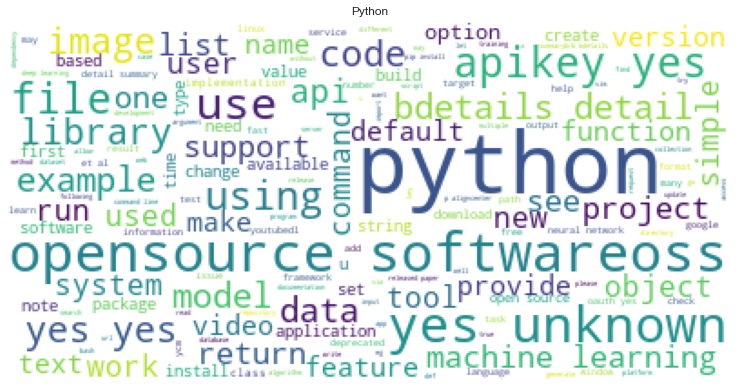

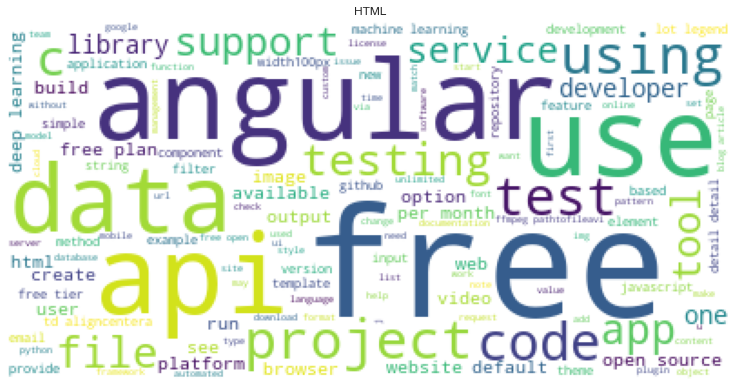

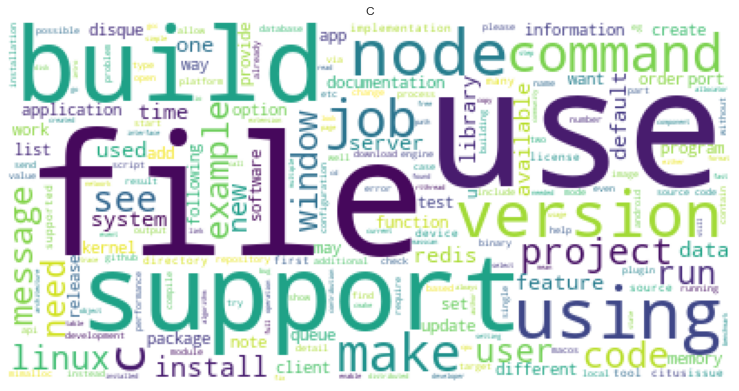

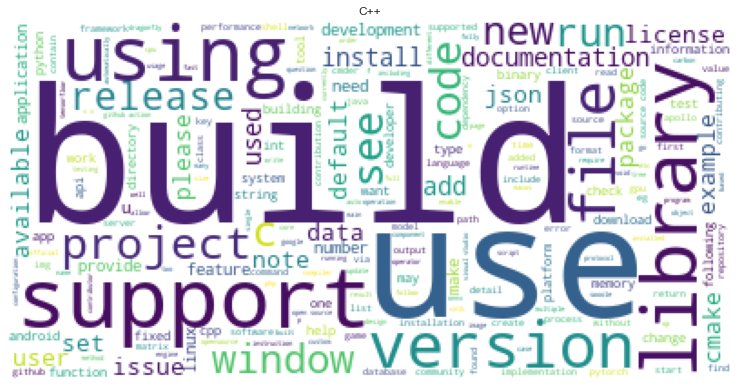

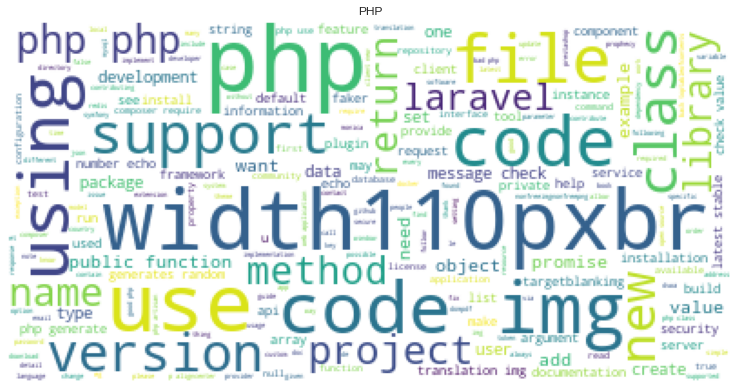

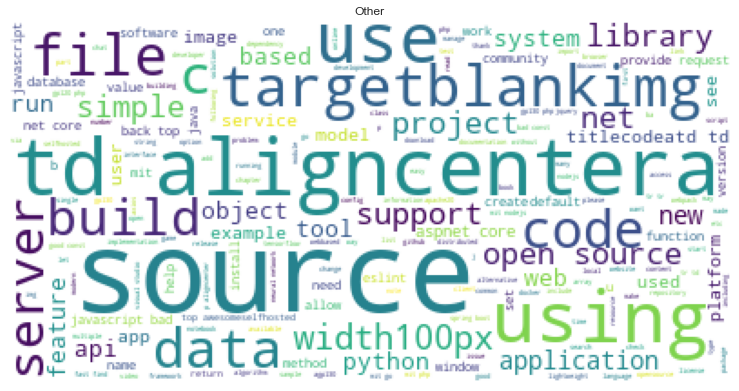

In [38]:
for l in languages:
    
    img = WordCloud(background_color= 'white')\
    .generate(l.words)
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(l.label)
    plt.show()

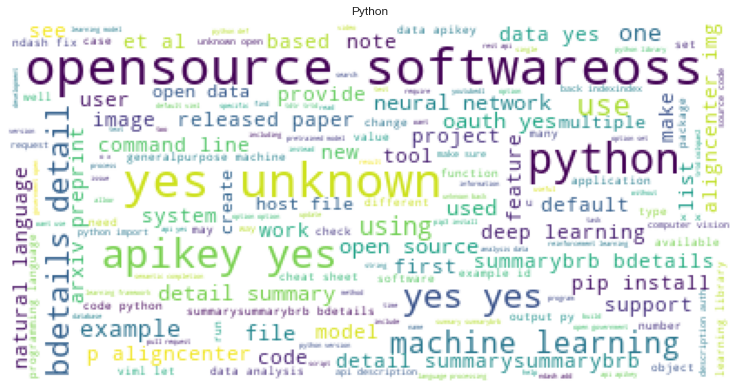

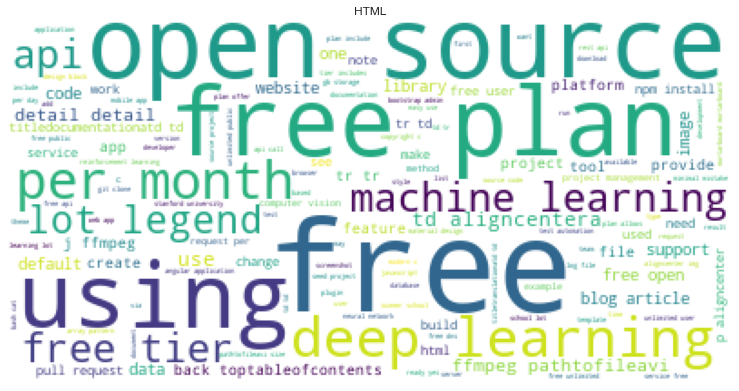

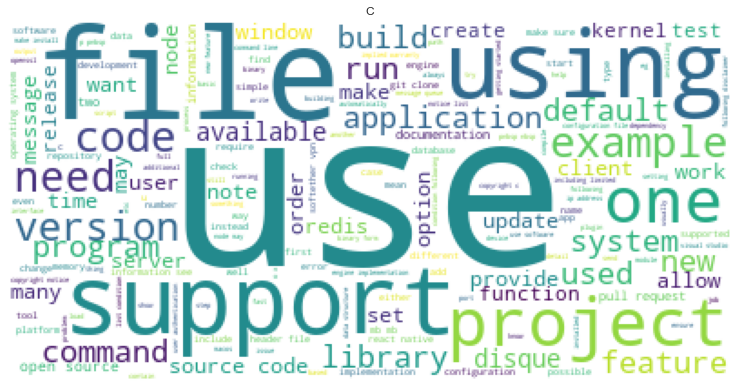

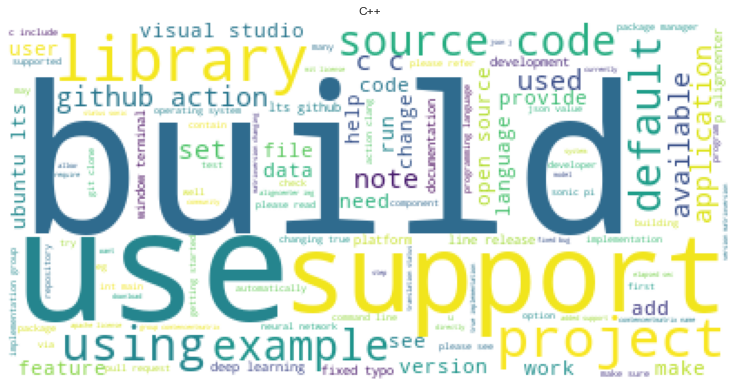

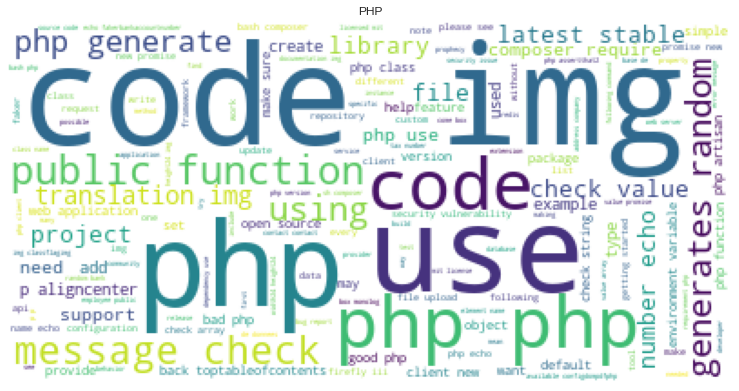

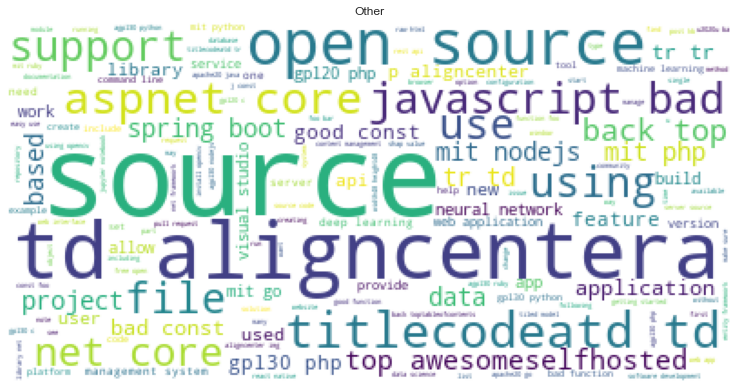

In [173]:
for l in languages:
    
    img = WordCloud(background_color= 'white',collocation_threshold=10)\
    .generate(l.words)
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(l.label)
    plt.show()

In [60]:
for l in languages:
    
    img = WordCloud(background_color= 'white')\
    .generate(l.bigrams())
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(l.label)
    plt.show()

TypeError: expected string or bytes-like object

In [91]:
pd.Series(list(nltk.bigrams(python.words.split())))

0                                                 (2021, 1)
1                                                    (1, 2)
2                                                    (2, 3)
3                                                    (3, 4)
4                                                    (4, 5)
                                ...                        
170696                                        (ztm, course)
170697                                        (course, one)
170698                                       (one, monthly)
170699                              (monthly, subscription)
170700    (subscription, herehttpszerotomasteryiocourses...
Length: 170701, dtype: object

In [138]:
# gramslist = []
# for grams in list(nltk.bigrams(python.words.split())):
#     gramslist.append(grams.replace(' ','_'))
    

In [96]:
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in python.words]

In [103]:
pywords = df.original[df.language == 'Python']

In [107]:
import prepare

In [131]:
df= df.reset_index()

In [165]:
stopper = prepare.stopwords.words('english')
stopper.extend(['http','https','1','2','3','4','5','6','7','8','9','0','img','png'])
# stopper

In [150]:
stopper

In [147]:
def re_stop(string):
    my_words = string.split()
    dont_stop = [word for word in my_words if word not in stopper]
    unstopped = ' '.join(dont_stop)
    return unstopped

In [174]:
df['true_clean'] = pd.Series([' '.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in df.original])\
.apply(prepare.basic_clean)\
.apply(str.strip)\
.apply(prepare.tokenize)\
.apply(prepare.remove_stopwords)\
.apply(prepare.lemmatize)

In [166]:
df.true_clean = df.true_clean.apply(re_stop)

In [175]:
df.true_clean.head(20)

0     2021 1 2 3 4 5 6 7 8 mysql 9 redis 10 mongodb ...
1     v2rayn v2ray client window support xray core h...
2     logo logo png http 30secondsofcode orgjsp1 30 ...
3     p aligncenter img srchttps cdn jsdelivr netgh5...
4     build status http github comairbladeri3actions...
5     p aligncenter img srcimageswled logo akemi png...
6     docsdemo guideimagesapollo logo png build stat...
7     banner imgbanner png rawtrue license http img ...
8     telegram http raw githubusercontent compatrola...
9     english doc readme md docreadme zh md turkce d...
10    caffe build status http travis ci orgbvlccaffe...
11    logologo http github comblankjandroidutilcode ...
12    div aligncenter img src githublogo main black ...
13    p aligncenter img srchttps demo cachethq ioimg...
14    bayesian method hacker http camdavidsonpilon g...
15    chart cs github version http img shield iogith...
16    iosinterviewquestions p aligncenter href img s...
17    clickhouse open source distributed column 

In [168]:
# [' '.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in pywords]

In [169]:
len(python.words)

1868189

In [170]:
len(html.words)

855239